
## Experiment 1
The goal of this project is to query the Northwinds database to get the data needed to perform FOUR statistical analyses and their appropriate hypothesis tests to generate analytical insights that can be of value to the company.


#### Experiment 1 - Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

In [1]:
# Import libraries
import pandas as pd
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.power import  tt_ind_solve_power
import scipy.stats as stats

In [2]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT Discount, Quantity 
               FROM OrderDetail
               JOIN Product
               USING(UnitPrice)
               ;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,Discount,Quantity
0,0.0,12
1,0.0,12
2,0.0,12
3,0.0,12
4,0.0,5


In [3]:
df1.describe()

,Discount,Quantity
count,2458.000000,2458.000000
mean,0.058035,23.815297
std,0.085474,19.473453
min,0.000000,1.000000
25%,0.000000,10.000000
50%,0.000000,20.000000
75%,0.100000,30.000000
max,0.250000,130.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 2 columns):
Discount    2458 non-null float64
Quantity    2458 non-null int64
dtypes: float64(1), int64(1)
memory usage: 38.5 KB


In [5]:
df1.Discount.value_counts()

0.00    1497
0.05     209
0.20     198
0.25     191
0.15     184
0.10     170
0.03       3
0.01       2
0.02       2
0.04       1
0.06       1
Name: Discount, dtype: int64

In [6]:
# Determine the mu for the sales without a discount
Without_Discount = df1[df1['Discount'] == 0]
Without_Discount.describe()

,Discount,Quantity
count,1497.0,1497.000000
mean,0.0,21.851035
std,0.0,17.655569
min,0.0,1.000000
25%,0.0,10.000000
50%,0.0,20.000000
75%,0.0,30.000000
max,0.0,130.000000


In [7]:
# Determine the mu for the sales with a discount
With_Discount = df1[df1['Discount'] > 0]
With_Discount.describe()

,Discount,Quantity
count,961.000000,961.000000
mean,0.148439,26.875130
std,0.072558,21.665713
min,0.010000,1.000000
25%,0.100000,12.000000
50%,0.150000,20.000000
75%,0.200000,35.000000
max,0.250000,130.000000


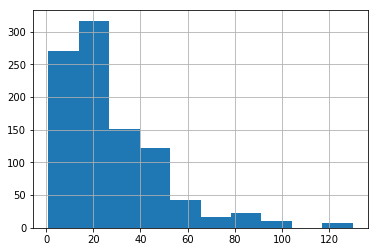

In [8]:
With_Discount.Quantity.hist()

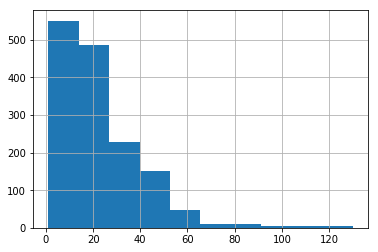

In [9]:
Without_Discount.Quantity.hist()

In [10]:
# Quantity on x-axis, percents on y-axis combining two histograms

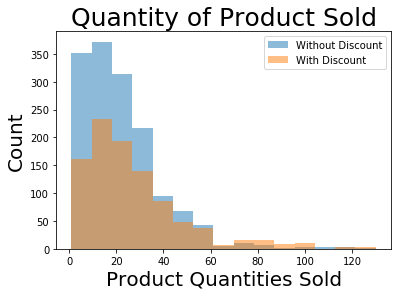

In [11]:
from matplotlib import pyplot
pyplot.hist(Without_Discount.Quantity, bins=15, alpha=0.5, label='Without Discount')
pyplot.hist(With_Discount.Quantity, bins=15, alpha=0.5, label='With Discount')
pyplot.legend(loc='upper right')
pyplot.ylabel("Count",fontsize=20)
pyplot.xlabel("Product Quantities Sold", fontsize=20)
pyplot.title('Quantity of Product Sold', fontsize=25)
pyplot.show()

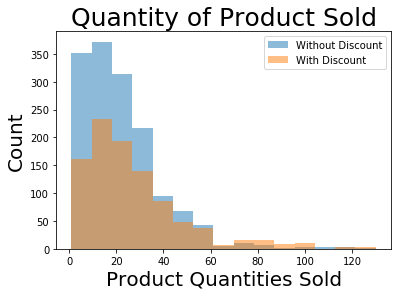

In [12]:
from matplotlib import pyplot
pyplot.hist(Without_Discount.Quantity, bins=15, alpha=0.5, label='Without Discount')
pyplot.hist(With_Discount.Quantity, bins=15, alpha=0.5, label='With Discount')
pyplot.legend(loc='upper right')
pyplot.ylabel("Count",fontsize=20)
pyplot.xlabel("Product Quantities Sold", fontsize=20)
pyplot.title('Quantity of Product Sold', fontsize=25)
pyplot.show()

In [13]:
# Mean of Discounted Group
mu_1 = With_Discount.Quantity.mean()
mu_1

26.87513007284079

In [14]:
# Mean of Non-discounted Group
mu_2 = Without_Discount.Quantity.mean()
mu_2

21.851035404141616

## The Null Hypothesis, $H_0$
The Null Hypothesis for Experiment 1 is that a discount will have no effect on the quantity of sales.

mu_1 = mu_2

## The Alternative Hypothesis, $H_1$
The Alternative Hypothesis for Experiment 1 is that discounted items will have different sales.

mu_1 > mu_2

I now have two equal sized groups though the variances of the two groups is different. I will use an alpha value of 0.05 in order to reject the null.

In [15]:
# Independent two sample t-test (assuming the variances are similar enough)

In [16]:
# Below are the stats needed for the t-test
mu_1 = With_Discount.Quantity.mean()
mu_2 = Without_Discount.Quantity.mean()
std_1 = With_Discount.Quantity.std()
std_2 = Without_Discount.Quantity.std()
n_1 = len(With_Discount.Quantity)
n_2 = len(Without_Discount.Quantity)
df = n_1 + n_2 - 2

In [17]:
# Formula for the t-test
t = (mu_1/mu_2)/((std_1**2/n_1)+(std_2**2/n_2))**0.5
t

1.4735377305854864

In [18]:
# Convert the t-score to the p-value using the cumulative density function.
p = 1-stats.t.cdf(np.abs(t), df)
p

0.07036712410005208

In [19]:
# 0.084 > 0.05 Therefore we accept the null, meaning that there is NO difference with or without a discount.

In [20]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [21]:
d = Cohen_d(With_Discount.Quantity, Without_Discount.Quantity)
d

0.2600093359962642

In [22]:
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=961)
power

0.9999067416728048

According to my results, the p-value is large enough that I can't safely reject the null - This means that there is not enough evidence to state that the sales will be larger with the discounted group.

# Questions:
* Do I need to split the data up into two equal groups?
* Can I instead take out a random sample that will be normally distributed?
* Which test should I use?

In [23]:
# Two sample t-statistic

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kernel Density Estimation')

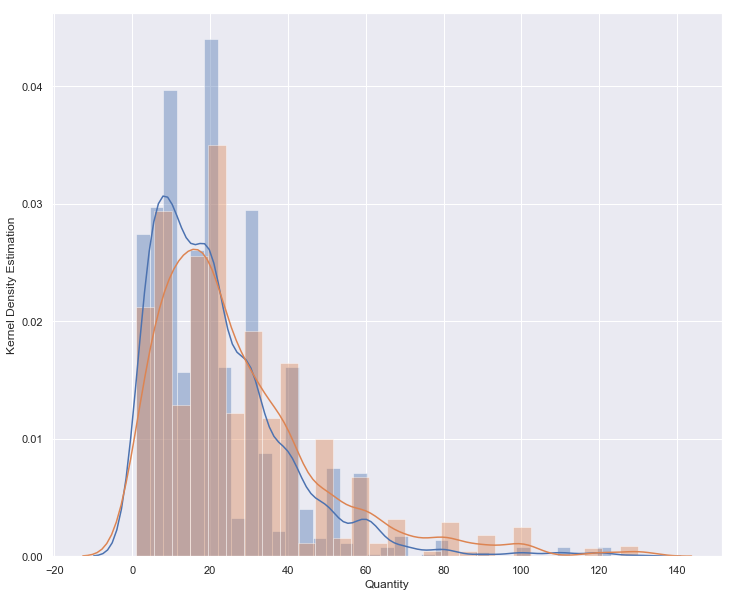

In [24]:
# Visualize the data
sns.set(color_codes=True);
sns.set(rc={'figure.figsize':(12,10)});
sns.distplot(Without_Discount.Quantity, kde=True, norm_hist=False); # Red distribution
sns.distplot(With_Discount.Quantity, kde=True, norm_hist=False); # Blue distribution
plt.ylabel("Kernel Density Estimation")

In [25]:
# Difference between distribution means
Without_Discount.Quantity.mean()
With_Discount.Quantity.mean()
diff = With_Discount.Quantity.mean() - Without_Discount.Quantity.mean()
diff

5.024094668699174

In [26]:
# Find the variance
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [27]:
# Find the pooled variance
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [28]:
# t-stat calculation
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(With_Discount.Quantity, Without_Discount.Quantity)
t_stat

6.290406908126132

In [29]:
# A t-stat of + or - 5 means that there is going to be very little probability that the data
# would fall in this range.

In [30]:
# Get critical value. For alpha = 0.05 and two tailed test
crit = stats.t.ppf(1-0.025, (len(With_Discount.Quantity)+len(With_Discount.Quantity)-2))
crit

1.9612003084854728

In [31]:
# Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-(t_stat), (len(With_Discount.Quantity)+len(With_Discount.Quantity)-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(t_stat, (len(With_Discount.Quantity)+len(With_Discount.Quantity)-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

3.9109582801168074e-10


In [32]:
# 0.0000004075 < 0.05 is the probability that there is a difference so we reject the Null, 
# meaning that a discount does affect sales.

In [33]:
d = Cohen_d(With_Discount.Quantity, Without_Discount.Quantity)
d

0.2600093359962642

In [34]:
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=961)
power

0.9999067416728048

In [35]:
# Thought I would also try Welchs T test as well.

In [36]:
# %load flatiron_stats.py
#flatiron_stats
import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [37]:
p_value_welch_ttest(With_Discount.Quantity, Without_Discount.Quantity, two_sided=False)

1.06517838993625e-09

In [38]:
# p-value of 0.00000000382  < 0.05  Reject the null, meaning that discount does matter!

In [39]:
# Formula for Cohen's D to calculate the effect size!

In [40]:
# Calculate Effect Size with Cohen's D
d = Cohen_d(With_Discount.Quantity, Without_Discount.Quantity)
d

0.2600093359962642

In [41]:
# Check the Statistical Power
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=n_1)
power

0.9999067416728048

In [42]:
# power probability of rejecting the null when you should be rejected (false negative )

In [43]:
# This time I will take a random sample

In [44]:
# Determine Sample Size
mu = Without_Discount.Quantity.mean()
print(mu)
std = Without_Discount.Quantity.std()
print(std)
power = 0.8
alpha = 0.05
diff = 5
effect_size = diff/std

sample_size = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)
sample_size

21.851035404141616
17.655568664770318


196.69616829794194

In [45]:
# Random sample without discount
a = Without_Discount.Quantity.sample(n=200, random_state=2)
a.head()

2173    12
1545    48
2107    40
135     30
474     18
Name: Quantity, dtype: int64

In [46]:
# Random sample with discount
b = With_Discount.Quantity.sample(n=200, random_state=2)
b.head()

2137    24
703     25
677     12
1674    12
2325     4
Name: Quantity, dtype: int64

In [47]:
p_value_welch_ttest(a, b, two_sided=False)

0.00159654289615474

In [48]:
d = Cohen_d(a, b)
d

-0.2967418578454743

In [49]:
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=200)
power

0.8414145581137602

In [52]:
stats.ttest_ind(With_Discount.Quantity, Without_Discount.Quantity, equal_var = False)

Ttest_indResult(statistic=6.0192242098850555, pvalue=2.130356906716644e-09)

In [50]:
# Extra

#### Different group sizes
I notice that the discounted sales are a smaller group than the non-discounted sales.
I remember a lesson that took a sample of the one group to match the other group in order to
make the two groups the same size in order to get a better representation of the statistical
difference.

In [55]:
# Account for different sized groups
minority = df1[df1['Discount'] > 0]
undersampled_majority = df1[df1['Discount'] == 0].sample(n=len(minority))
df1 = pd.concat([minority, undersampled_majority])
df1.Discount.value_counts()

0.00    961
0.05    209
0.20    198
0.25    191
0.15    184
0.10    170
0.03      3
0.01      2
0.02      2
0.04      1
0.06      1
Name: Discount, dtype: int64

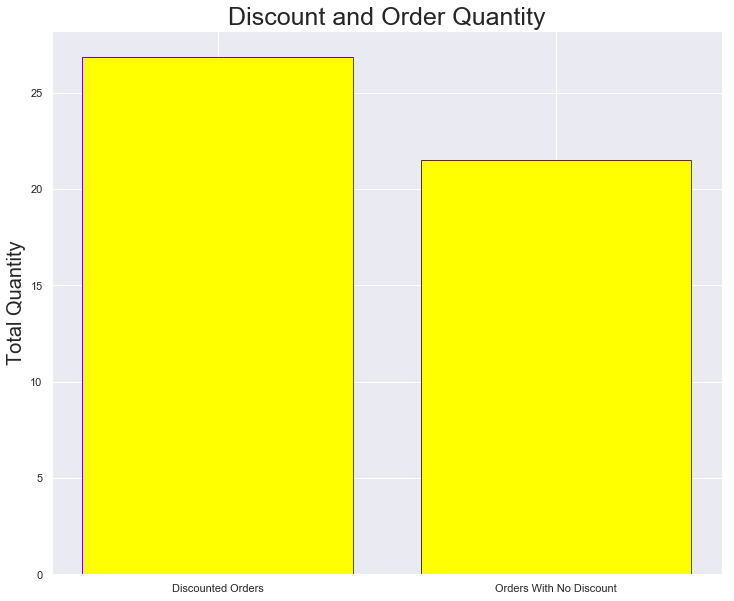

In [53]:
# Make dataset
height = [26.87, 21.49]
bars = ('Discounted Orders','Orders With No Discount')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color="yellow", edgecolor="#6a0dad")
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Total Quantity",fontsize=20)
#plt.xlabel("Shipping Companies", fontsize=20)
plt.title('Discount and Order Quantity', fontsize=25)
# Show graphic
plt.show()